# Imports

In [83]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 

In [84]:
df_clean = pd.read_csv("data/data_clean.csv")

In [85]:
np.random.seed(123)

In [86]:
df_clean

,index,longitude,latitude,_<1H OCEAN,_INLAND,_ISLAND,_NEAR BAY,_NEAR OCEAN,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,2072.0,-119.84,36.77,0,1,0,0,0,6.0,1853.0,473.0,1397.0,417.0,1.4817,72000.0
1,10600.0,-117.80,33.68,1,0,0,0,0,8.0,2032.0,349.0,862.0,340.0,6.9133,274100.0
2,2494.0,-120.19,36.60,0,1,0,0,0,25.0,875.0,214.0,931.0,214.0,1.5536,58300.0
3,4284.0,-118.32,34.10,1,0,0,0,0,31.0,622.0,229.0,597.0,227.0,1.5284,200000.0
4,16541.0,-121.23,37.79,0,1,0,0,0,21.0,1922.0,373.0,1130.0,372.0,4.0815,117900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16155,13895.0,-116.32,34.14,0,1,0,0,0,20.0,1465.0,278.0,745.0,250.0,3.0625,93800.0
16156,19814.0,-119.25,36.56,0,1,0,0,0,49.0,2365.0,504.0,1131.0,458.0,2.6133,103100.0
16157,17109.0,-122.21,37.46,0,0,0,0,1,19.0,2531.0,461.0,1206.0,429.0,4.4958,192600.0
16158,18063.0,-122.01,37.26,1,0,0,0,0,39.0,2776.0,840.0,2546.0,773.0,2.5750,153500.0


# Bootstrapping 

In [87]:
np.mean(df_clean) # populaiton mean

/home/selmane/.pyenv/versions/3.8.12/envs/simplon/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


index                  10286.338057
longitude               -119.566478
latitude                  35.630071
_<1H OCEAN                 0.441151
_INLAND                    0.318502
_ISLAND                    0.000186
_NEAR BAY                  0.110396
_NEAR OCEAN                0.129765
housing_median_age        28.611015
total_rooms             2476.394802
total_bedrooms           509.289171
population              1352.346720
households               473.597092
median_income              3.764902
median_house_value    205728.489913
dtype: float64

In [88]:
np.std(df_clean) # population std

index                   5939.349720
longitude                  2.004698
latitude                   2.139183
_<1H OCEAN                 0.496525
_INLAND                    0.465896
_ISLAND                    0.013624
_NEAR BAY                  0.313383
_NEAR OCEAN                0.336045
housing_median_age        12.606199
total_rooms             1484.689885
total_bedrooms           302.756917
population               794.255812
households               275.602469
median_income              1.584774
median_house_value    113550.514604
dtype: float64

## step 1 : take a random sample from the population 

In [89]:
df_sample =  df_clean.sample(n = 1000, random_state = 1)

In [90]:
sample_mean = np.mean(df_sample)
sample_mean

index                  10419.774000
longitude               -119.525640
latitude                  35.529660
_<1H OCEAN                 0.459000
_INLAND                    0.297000
_ISLAND                    0.000000
_NEAR BAY                  0.106000
_NEAR OCEAN                0.138000
housing_median_age        28.122000
total_rooms             2473.149000
total_bedrooms           503.751000
population              1330.259000
households               468.030000
median_income              3.875906
median_house_value    210655.900000
dtype: float64

In [91]:
sample_std = np.std(df_sample)
sample_std

index                   5997.650139
longitude                  1.995156
latitude                   2.052294
_<1H OCEAN                 0.498316
_INLAND                    0.456937
_ISLAND                    0.000000
_NEAR BAY                  0.307838
_NEAR OCEAN                0.344900
housing_median_age        12.371302
total_rooms             1546.766813
total_bedrooms           318.213556
population               820.809626
households               290.766857
median_income              1.600852
median_house_value    115086.932817
dtype: float64

## step 2 : bootstrap for 10,000 times 

In [92]:
boot_means = []

for _ in range(10000):
    boot_sample = df_sample.sample(n= 1000, random_state = 1)
    boot_mean = np.mean(boot_sample)
    boot_means.append(boot_mean)
boot_means_np = np.array(boot_means)
boot_means_df = boot_means

In [93]:
boot_means_np

array([[ 1.0419774e+04, -1.1952564e+02,  3.5529660e+01, ...,
         4.6803000e+02,  3.8759061e+00,  2.1065590e+05],
       [ 1.0419774e+04, -1.1952564e+02,  3.5529660e+01, ...,
         4.6803000e+02,  3.8759061e+00,  2.1065590e+05],
       [ 1.0419774e+04, -1.1952564e+02,  3.5529660e+01, ...,
         4.6803000e+02,  3.8759061e+00,  2.1065590e+05],
       ...,
       [ 1.0419774e+04, -1.1952564e+02,  3.5529660e+01, ...,
         4.6803000e+02,  3.8759061e+00,  2.1065590e+05],
       [ 1.0419774e+04, -1.1952564e+02,  3.5529660e+01, ...,
         4.6803000e+02,  3.8759061e+00,  2.1065590e+05],
       [ 1.0419774e+04, -1.1952564e+02,  3.5529660e+01, ...,
         4.6803000e+02,  3.8759061e+00,  2.1065590e+05]])

## step 4 : analysis and interpretation

In [94]:
boot_means = np.mean(boot_means_np)

In [95]:
boot_means

15053.324328406668

In [96]:
np.mean(df_clean)

index                  10286.338057
longitude               -119.566478
latitude                  35.630071
_<1H OCEAN                 0.441151
_INLAND                    0.318502
_ISLAND                    0.000186
_NEAR BAY                  0.110396
_NEAR OCEAN                0.129765
housing_median_age        28.611015
total_rooms             2476.394802
total_bedrooms           509.289171
population              1352.346720
households               473.597092
median_income              3.764902
median_house_value    205728.489913
dtype: float64

In [97]:
boot_std = np.std(boot_means_np)
boot_std

52341.0715226238

In [98]:
np.std(df_clean)

index                   5939.349720
longitude                  2.004698
latitude                   2.139183
_<1H OCEAN                 0.496525
_INLAND                    0.465896
_ISLAND                    0.013624
_NEAR BAY                  0.313383
_NEAR OCEAN                0.336045
housing_median_age        12.606199
total_rooms             1484.689885
total_bedrooms           302.756917
population               794.255812
households               275.602469
median_income              1.584774
median_house_value    113550.514604
dtype: float64

In [99]:
np.percentile(boot_means_np, [2.5,97.5])# 95% C.I.

array([-1.1952564e+02,  2.1065590e+05])

## Step 5 : Distribution and C.I in Graph

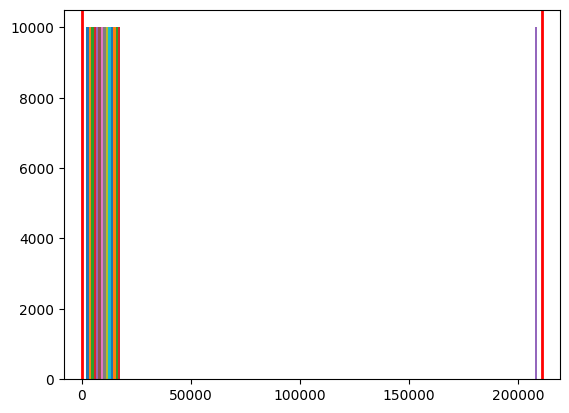

In [100]:
plt.hist(boot_means_np, alpha = 1)
plt.axvline(np.percentile(boot_means_np, 2.5), color = 'red', linewidth = 2)
plt.axvline(np.percentile(boot_means_np, 97.5), color = 'red', linewidth = 2)

# Correlation entre 2 variables quantitatives